# Live Coding Session 4:
What you will learn in this session:
 * [Pandas Dataframes](../Lecture/PD01Pandas.ipynb) 
     * Import Data from .csv
     * Access and filter operations
     * Arithmetic and statistical operations on dataframes
     * Grouping
     * Concatenation
     * Plotting
 * Visualisation with [Matplotlib](../Lecture/PLT01visualization.ipynb)
 * Visualisation with [Seaborn](https://seaborn.pydata.org/)
 
 
 


In [32]:
%matplotlib inline
import pandas as pd
#pd.show_versions()

## Import data and first inspection
The dataset on video-games sales is publicly available from here: [Video Game Dataset](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/data). The downloaded .csv file can be found in directory [R/Lecture/data/VideoGamesSales-22-12-2016.csv](../../R/Lecture/data/VideoGamesSales-22-12-2016.csv).

### Datastructure and -Quality

**Tasks:** 
1. Apply the *Pandas*-function `read_csv()` to importing this dataset.
2. Display the first 5 rows of this dataset
3. Determine the size of this dataset.
4. Query the names of the dataset's columns

In [100]:
gameDataAll=pd.read_csv("../../R/Lecture/data/VideoGamesSales-22-12-2016.csv",sep=",",encoding="utf-8")
print gameDataAll.shape
gameDataAll.head(5)

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Print name of columns:

In [101]:
gameDataAll.columns

Index([u'Name', u'Platform', u'Year_of_Release', u'Genre', u'Publisher',
       u'NA_Sales', u'EU_Sales', u'JP_Sales', u'Other_Sales', u'Global_Sales',
       u'Critic_Score', u'Critic_Count', u'User_Score', u'User_Count',
       u'Developer', u'Rating'],
      dtype='object')

**Tasks:**
1. We are only interested in sales figures, not in the scoring data. Therefore only the columns from `Name` to `Global_Sales` shall be considered. Extract the dataframe, which contains only the relevant columns:

In [107]:
salesCols=gameDataAll.columns[:10]
print salesCols
gameData=gameDataAll[salesCols]

Index([u'Name', u'Platform', u'Year_of_Release', u'Genre', u'Publisher',
       u'NA_Sales', u'EU_Sales', u'JP_Sales', u'Other_Sales', u'Global_Sales'],
      dtype='object')


**Tasks**
1. Remove all rows with NaNs. How much rows remain?

In [109]:
gameDataClean=gameData.dropna(axis=0)
print gameDataClean.shape
gameDataClean.head(5)

(16416, 10)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Tasks:**
1. Get the `Global_Sales` value of the game *Mario Kart Wii*.
2. Get all data of the game *Mario Kart Wii*.
3. Get all `Global_Sales`-values

In [121]:
print gameDataClean.loc[2,"Global_Sales"]
print gameDataClean.iloc[2,9]

35.52
35.52


In [126]:
print gameDataClean.loc[gameDataClean["Name"]=="Mario Kart Wii","Global_Sales"]

2    35.52
Name: Global_Sales, dtype: float64


In [127]:
gameDataClean.loc[2,]

Name               Mario Kart Wii
Platform                      Wii
Year_of_Release              2008
Genre                      Racing
Publisher                Nintendo
NA_Sales                    15.68
EU_Sales                    12.76
JP_Sales                     3.79
Other_Sales                  3.29
Global_Sales                35.52
Name: 2, dtype: object

In [124]:
gameDataClean.loc[:,"Global_Sales"]

0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
5        30.26
6        29.80
7        28.92
8        28.32
9        28.31
10       24.67
11       23.21
12       23.10
13       22.70
14       21.81
15       21.79
16       21.04
17       20.81
18       20.61
19       20.15
20       18.25
21       18.14
22       17.28
23       16.27
24       16.15
25       15.85
26       15.29
27       15.14
28       14.98
29       14.73
         ...  
16689     0.01
16690     0.01
16691     0.01
16692     0.01
16693     0.01
16694     0.01
16695     0.01
16696     0.01
16697     0.01
16698     0.01
16699     0.01
16700     0.01
16701     0.01
16702     0.01
16703     0.01
16704     0.01
16705     0.01
16706     0.01
16707     0.01
16708     0.01
16709     0.01
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
16715     0.01
16716     0.01
16717     0.01
16718     0.01
Name: Global_Sales, dtype: float64

### Descriptive Statistics of numerical features

**Tasks:**
1. Calculate for all numeric variables descriptive statistics, like mean, standard-deviation and quantiles.
2. Calculate for all categorical variables the frequency-distribution and visualize the corresponding histogram.

In [128]:
gameDataClean.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000


### Frequency Distribution of non-numerical features

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64


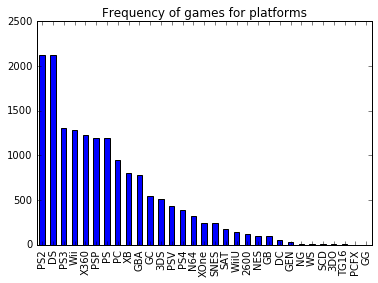

In [129]:
print gameDataClean['Platform'].value_counts()
gameDataClean['Platform'].value_counts().plot(kind="bar",title="Frequency of games for platforms")

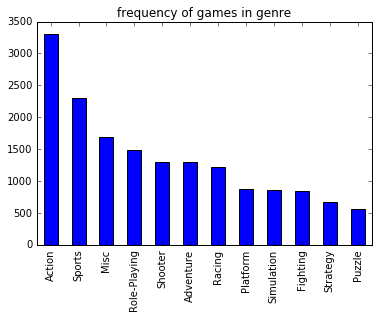

In [130]:
gameDataClean['Genre'].value_counts()
gameDataClean['Genre'].value_counts().plot(kind="bar",title="frequency of games in genre")


In [131]:
gameDataClean['Publisher'].value_counts().head(10)

Electronic Arts                 1344
Activision                       976
Namco Bandai Games               935
Ubisoft                          930
Konami Digital Entertainment     825
THQ                              712
Nintendo                         700
Sony Computer Entertainment      686
Sega                             631
Take-Two Interactive             421
Name: Publisher, dtype: int64

## Accumulated sales per genre and region
The following questions shall be solved by corresponding data analysis:
1. Which game-genres have the best total global sales figures?
2. Are there significant differences in the genres total sales figures with respect to the three different regions North-America, Europe and Japan? 

In [132]:
salesGenre=gameDataClean.groupby(by="Genre")["Global_Sales"].sum()
salesGenre

Genre
Action          1717.62
Adventure        233.25
Fighting         442.63
Misc             783.19
Platform         825.86
Puzzle           240.33
Racing           723.69
Role-Playing     930.90
Shooter         1041.83
Simulation       388.22
Sports          1310.39
Strategy         172.69
Name: Global_Sales, dtype: float64

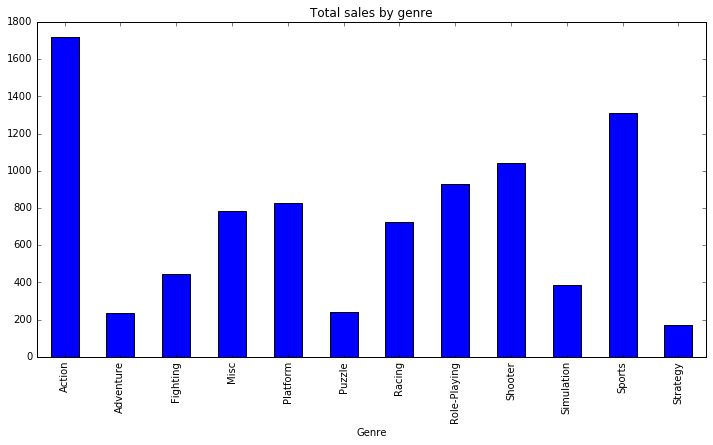

In [133]:
salesGenre.plot(kind="bar",figsize=(12,6),title="Total sales by genre")

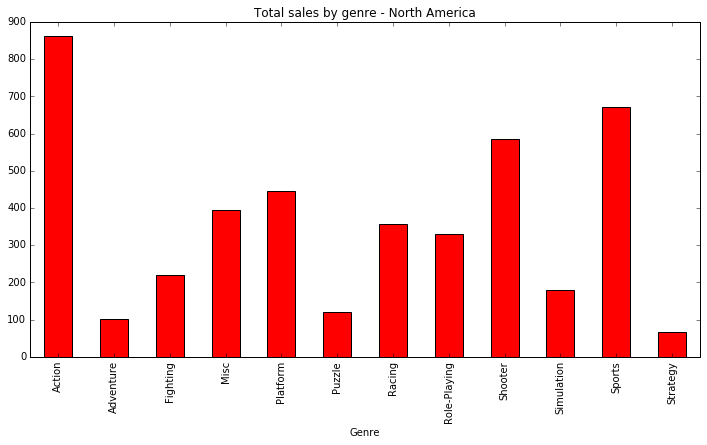

In [134]:
salesGenreNA=gameDataClean.groupby(by="Genre")["NA_Sales"].sum()
salesGenreNA.plot(kind="bar",figsize=(12,6),color="r",title="Total sales by genre - North America")

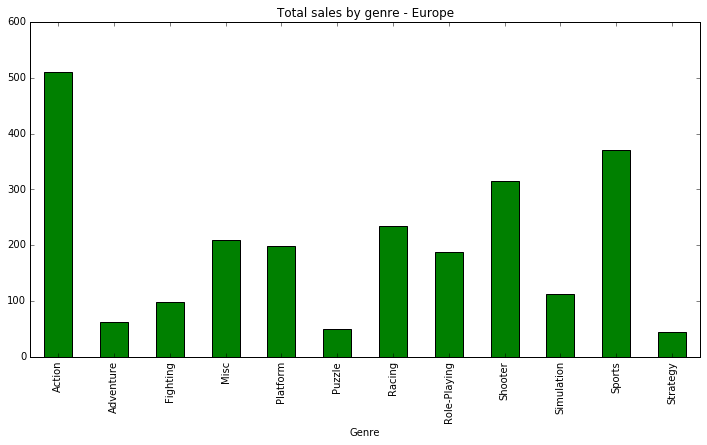

In [135]:
salesGenreEU=gameDataClean.groupby(by="Genre")["EU_Sales"].sum()
salesGenreEU.plot(kind="bar",figsize=(12,6),color="g",title="Total sales by genre - Europe")

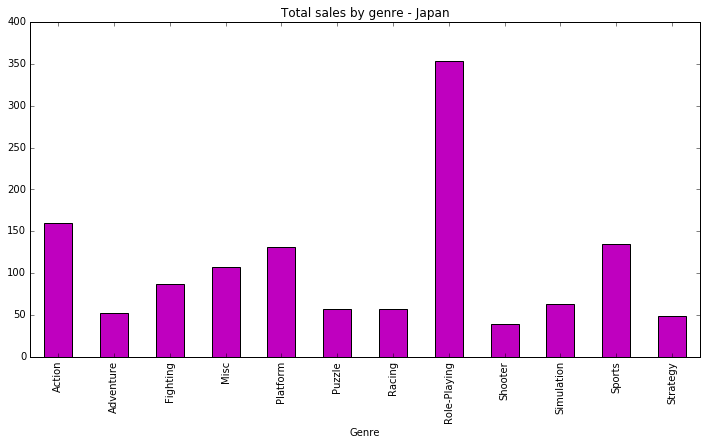

In [136]:
salesGenreJP=gameDataClean.groupby(by="Genre")["JP_Sales"].sum()
salesGenreJP.plot(kind="bar",figsize=(12,6),color="m",title="Total sales by genre - Japan")

It is difficult to compare the three regions, since their genre-specific sales figures are not neatly arranged. Improve this by
1. Arranging the regional genre specific sales-figures in a single dataframe
2. Plotting the total genre-specific sales in a single graph. 

In [139]:
salesGenreAll=pd.concat([salesGenreNA,salesGenreEU,salesGenreJP],axis=1)
salesGenreAll

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,863.17,510.99,160.14
Adventure,101.39,63.15,52.22
Fighting,220.51,99.00,87.28
Misc,394.01,208.55,107.02
Platform,444.44,199.39,130.71
Puzzle,121.13,49.78,56.68
Racing,356.86,234.48,56.63
Role-Playing,330.04,188.24,353.44
Shooter,584.83,314.52,38.68


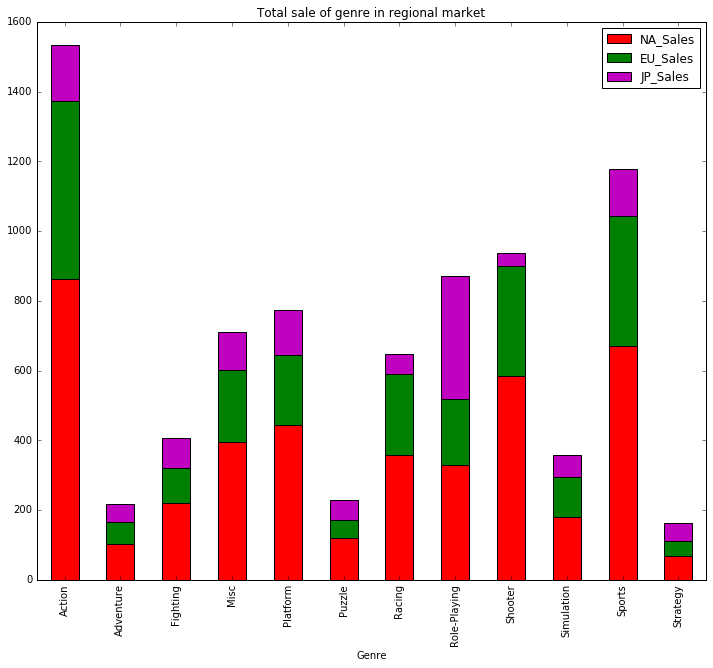

In [140]:
salesGenreAll.plot(kind="bar",stacked=True, figsize=(12,10),color=["r","g","m"],title="Total sale of genre in regional market")

The drawback of the stacked histogram above is, that it plots absolute sales-figures, but not relative. The question whether the different regions have different genre preferences can be answered better, if each genre-specific total amount of sales is calculated relative to the total amount of sales in the region. This shall be implemented below. 

First new columns are added to the dataframe, which contain the relative genre-specific sales figures. Then these relative values are visualized in a stacked barplot.

In [141]:
salesGenreAll["NArelative"]=salesGenreAll["NA_Sales"]/salesGenreAll["NA_Sales"].sum()
salesGenreAll["EUrelative"]=salesGenreAll["EU_Sales"]/salesGenreAll["EU_Sales"].sum()
salesGenreAll["JPrelative"]=salesGenreAll["JP_Sales"]/salesGenreAll["JP_Sales"].sum()

In [142]:
salesGenreAll

,NA_Sales,EU_Sales,JP_Sales,NArelative,EUrelative,JPrelative
Genre,,,,,,
Action,863.17,510.99,160.14,0.199073,0.213153,0.124075
Adventure,101.39,63.15,52.22,0.023384,0.026342,0.040460
Fighting,220.51,99.00,87.28,0.050856,0.041297,0.067624
Misc,394.01,208.55,107.02,0.090871,0.086994,0.082918
Platform,444.44,199.39,130.71,0.102501,0.083173,0.101273
Puzzle,121.13,49.78,56.68,0.027936,0.020765,0.043915
Racing,356.86,234.48,56.63,0.082303,0.097810,0.043876
Role-Playing,330.04,188.24,353.44,0.076117,0.078522,0.273842
Shooter,584.83,314.52,38.68,0.134880,0.131198,0.029969


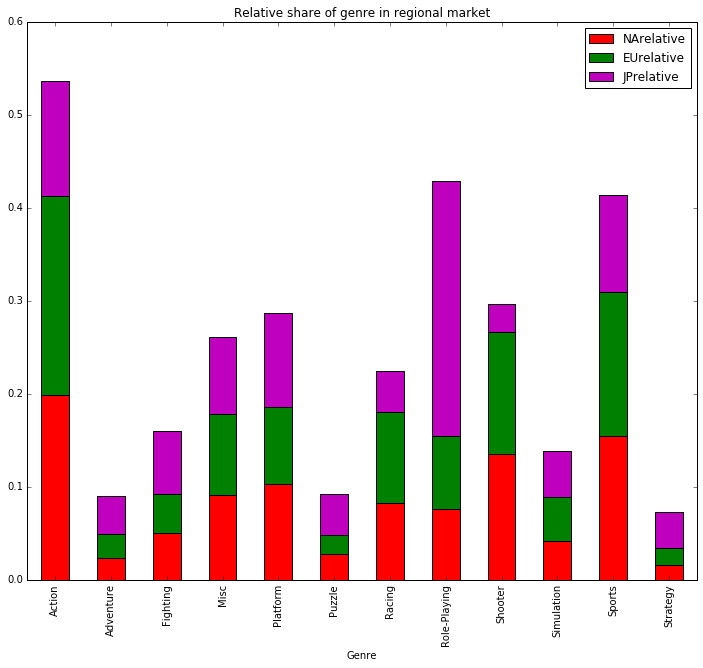

In [143]:
salesGenreAll[["NArelative","EUrelative","JPrelative"]].plot(kind="bar",stacked=True, figsize=(12,10),color=["r","g","m"],title="Relative share of genre in regional market")

## Topsellers
**Task:**
1. Determine the games, which belong to the best 2% with respect to global sales figure.

In [144]:
top2percent=gameDataClean[gameDataClean["Global_Sales"]>gameDataClean["Global_Sales"].quantile(q=0.98)]

In [145]:
top2percent

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Correlation Analysis
**Task:**
For all numeric features in gameDataAll the pairwise correlation shall be calculated and visualized in a heatmap.
1. From the entire video games data (not only the sales-specific features) extract all rows, which have only non-Nan entries.
2. Determine the sub-dataframe, which contains all numeric features.
3. Apply [seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) in order to visualize all pairwise correlations of the numeric features.
4. Plot `user_score` vs. `critic_score` in a [seaborn jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

In [165]:
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np

In [166]:
gameDataAllClean=gameDataAll.dropna(axis=0)
gameDataAllClean.shape

(6825, 16)

In [167]:
print gameDataAllClean["Platform"].unique()

[u'Wii' u'DS' u'X360' u'PS3' u'PS2' u'3DS' u'PS4' u'PS' u'XB' u'PC' u'PSP'
 u'WiiU' u'GC' u'GBA' u'XOne' u'PSV' u'DC']


In [175]:
pd.to_numeric(gameDataAllClean['User_Score'])

0        8.0
2        8.3
3        8.0
6        8.5
7        6.6
8        8.4
11       8.6
13       7.7
14       6.3
15       7.4
16       8.2
17       9.0
19       7.9
23       8.1
24       8.7
26       7.1
28       8.4
29       3.4
32       6.3
34       5.3
35       4.8
36       6.3
37       3.2
38       8.5
39       8.9
40       8.2
41       6.4
42       8.3
43       8.7
44       7.8
        ... 
16513    7.9
16514    8.3
16527    8.3
16530    7.9
16532    6.9
16533    7.9
16534    5.5
16536    5.7
16541    7.5
16549    8.0
16550    9.5
16553    7.6
16569    8.0
16573    7.9
16576    8.6
16588    7.9
16595    6.8
16601    6.0
16617    2.1
16618    8.7
16624    8.2
16631    9.5
16634    8.2
16644    3.8
16656    8.5
16667    2.4
16677    8.8
16696    7.6
16700    5.8
16706    7.2
Name: User_Score, dtype: float64

In [176]:
gameDataAllClean.select_dtypes(include=[np.number])

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
6,2006.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0
7,2006.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0
8,2009.0,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0
11,2005.0,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0
13,2007.0,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0
14,2010.0,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0
15,2009.0,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0


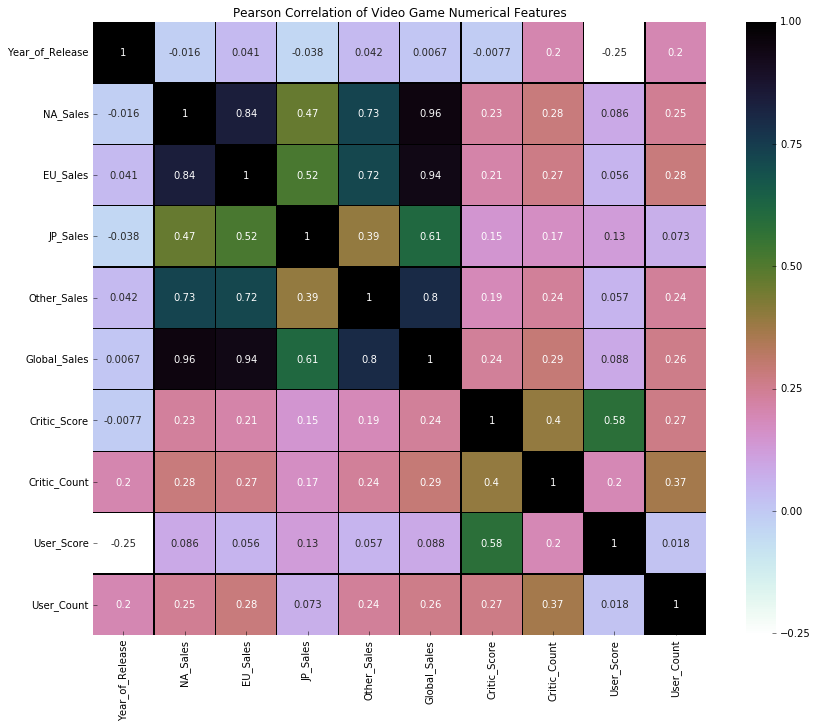

In [177]:
gameDataAllClean_num=gameDataAllClean.select_dtypes(include=[np.number])
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sb.heatmap(gameDataAllClean_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

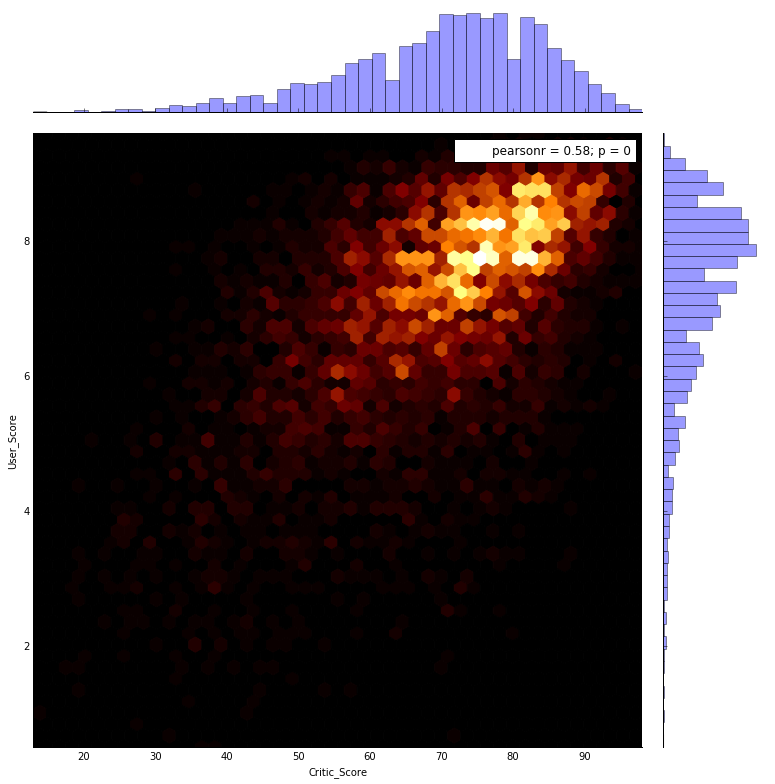

In [178]:
sb.jointplot(x='Critic_Score',y='User_Score',data=gameDataAllClean_num,
              kind='hex', cmap= 'afmhot', size=11)

## Temporal Analysis
**Task:**
1. Plot the temporal development of global sales figures by genre

In [210]:
salesGenreGlobal=gameDataClean.groupby(by=["Genre","Year_of_Release"])["Global_Sales"].sum()
salesGenreGlobal.index.levels[0]

Index([u'Action', u'Adventure', u'Fighting', u'Misc', u'Platform', u'Puzzle',
       u'Racing', u'Role-Playing', u'Shooter', u'Simulation', u'Sports',
       u'Strategy'],
      dtype='object', name=u'Genre')

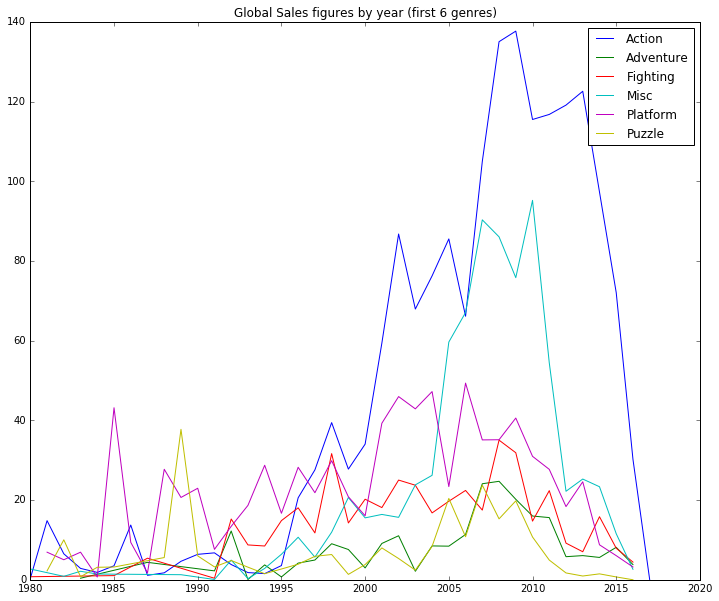

In [215]:
plt.figure(figsize=(12,10))
for c in salesGenreGlobal.index.levels[0][:6]:
    plt.plot(salesGenreGlobal[c],label=c)
plt.legend()
plt.title("Global Sales figures by year (first 6 genres)")

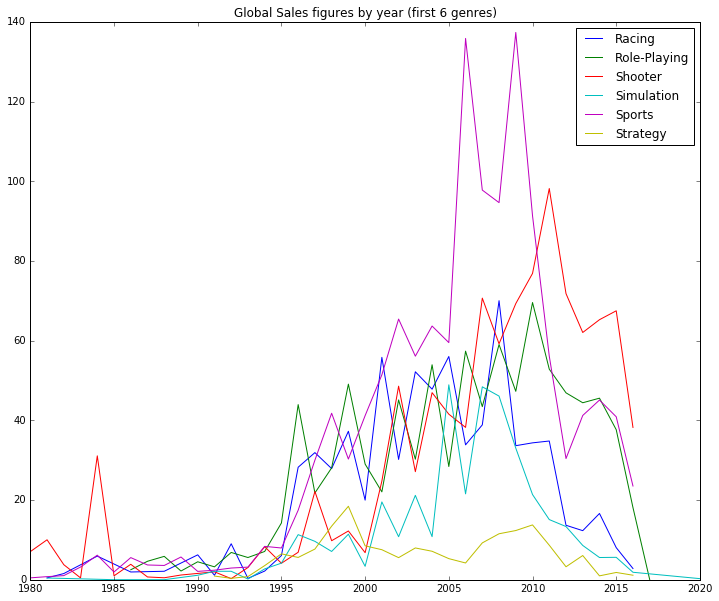

In [216]:
plt.figure(figsize=(12,10))
for c in salesGenreGlobal.index.levels[0][6:]:
    plt.plot(salesGenreGlobal[c],label=c)
plt.legend()
plt.title("Global Sales figures by year (first 6 genres)")